<a href="https://colab.research.google.com/github/Chum4k3r/ex_eletroacusticaI/blob/main/EA_EX3_MembranaTensionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solução por parâmetros concentrados para o sistema Membrana Tensionada

### A membrana tensionada é um sistema mecânico que pode ser representado pela analogia direta, ou analogia de impedâncias

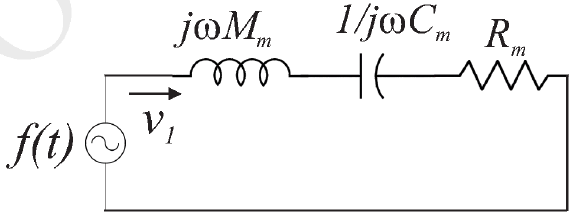

### Nessa analogia, a Força, $f(t)$, é análoga a Tensão Elétrica, $e(t)$.
### E a Velocidade, $v_{1}$, é análoga a Corrente Elétrica, $i_{1}$.

### Em um microfone de medição de típico, de meia polegada de diâmetro, tem-se:

> ## $T_{m} = 3160\ \text{N/m}$;
> ## $\rho_{m} = 890\ \text{kg/m}^{3}$;
> ## $t_{m} = 5\ \mu\text{m}$;
> ## $a_{m} = 6.3\ \text{mm}$;

### Com $T_{m}$ sendo a tensão, $\rho_{m}$ a densidade volumétrica, $t_{m}$ a espessura e $a_{m}$ o raio da membrana.

### Como pode ser visto na seção 3.3 da apostila de eletroacústica, as equações da massa e da compliância da membrana são:

 > ## $M_{m} = \large\frac{\pi a^{2} \rho_{m}t_{m}}{3}$
 > ## $C_{m} = \large\frac{1}{2\pi T_{m}}$



In [18]:
import numpy as np
from matplotlib import pyplot as plt

# Nome das variaveis para membrana de microfone
# m -> prefixo para grandeza referênte a membrana
# f -> valor em frequência


In [25]:
mTensao = 3160.  # Tensão mecânica aplicada a membrana
mDens = 890.  # Densidade volumétrica da composição dos materiais
mEspes = 5e-6   # Espessura da membrana
mRaio = 0.0063  # Raio da membrana

mMassa = np.pi * mRaio**2 * mDens * mEspes / 3  # Massa mecânica
mCompl = (2 * np.pi * mTensao)**-1  # Compliância mecânica

mVelProp = (mTensao / (mDens * mEspes))**0.5

print(f'\nTensão: {mTensao} N/m\nDensidade: {mDens} kg/m³\nEspessura: {mEspes*1e6} \u03bcm\nRaio: {mRaio*1e3} mm\n')
print(f'\nVelocidade de propagação do som: {mVelProp:.3f} m/s\n')
print(f'\nMassa = {mMassa*1e6:.3f} mg\nCompliância = {mCompl:.3e} m/N\n')



Tensão: 3160.0 N/m
Densidade: 890.0 kg/m³
Espessura: 5.0 μm
Raio: 6.3 mm


Velocidade de propagação do som: 842.682 m/s


Massa = 0.185 mg
Compliância = 5.037e-05 m/N



In [26]:
mVel = (mTensao / (mDens * mEspes))**0.5
mfRes = (1/(mCompl * mMassa))**0.5

print(f'\nVel. propagação = {mVel:.2f} m/s\nFreq. ressonância = {mfRes / (2*np.pi):.1f} Hz\n')



Vel. propagação = 842.68 m/s
Freq. ressonância = 52145.7 Hz



## Altere o valor da variável $\texttt{mAmort}$ para observar a mudança do comportamento da FRF. Algumas sugestões de valores:

> ## $[0.001, 0.03, 0.05, 0.1]$

In [42]:
mAmort =  0.025  # valor arbitrário de amortecimento
mAmCrit = 2 * mMassa * mfRes  # amortecimento crítico
mAmCoef = mAmort / mAmCrit  # coeficiente de amortecimento
mfResAm = mfRes * (1 - mAmCoef**2)**0.5  # ressonância amortecida em rad/s
fcut = mfResAm  / (2*np.pi)  # freq de corte

print(f'\nRessonância amortecida = {fcut:.1f} Hz\nAmortecimento crítico = {mAmCrit:.3f} Ns/m',
      f'\nCoeficiente de amortecimento = {mAmCoef:.3f}\nAmortecimento = {mAmort} Ns/m\n')



Ressonância amortecida = 51024.3 Hz
Amortecimento crítico = 0.121 Ns/m 
Coeficiente de amortecimento = 0.206
Amortecimento = 0.025 Ns/m



In [43]:
# Espaço de frequências para visualização
# Como a ressonância está localizada em 51 kHz
# Precisamos utilizar um espaço de frequências que contenha a ressonância
freqs = np.linspace(10000, 100000, 90001)
omega = lambda x: 2*np.pi*x
decibel = lambda sinal: 10 * np.log10((sinal**2))
rad2deg = lambda ang: 180 * ang / np.pi

mFRF = 1/(1/mCompl - omega(freqs)**2 * mMassa + 1j * omega(freqs) * mAmort)
mFRF_mag = np.abs(mFRF)
mFRF_ang = rad2deg(np.angle(mFRF))

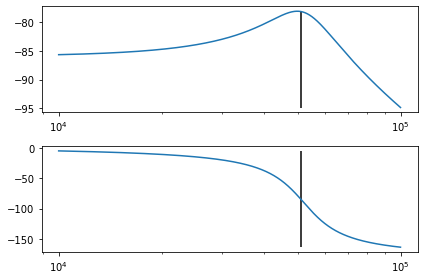

In [44]:
fig, axs = plt.subplots(2,1)

axs[0].semilogx(freqs, decibel(mFRF_mag))
axs[0].vlines(fcut, decibel(np.min(mFRF_mag)), decibel(np.max(mFRF_mag)))

axs[1].semilogx(freqs, mFRF_ang)
axs[1].vlines(fcut, np.min(mFRF_ang), np.max(mFRF_ang))

fig.tight_layout()
fig.show()
